In [1]:
# Encontrar Spark
import findspark

findspark.init()
findspark.find()

'E:\\LibreriasPython\\spark-3.0.2-bin-hadoop2.7-hive1.2\\python\\pyspark'

In [10]:
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

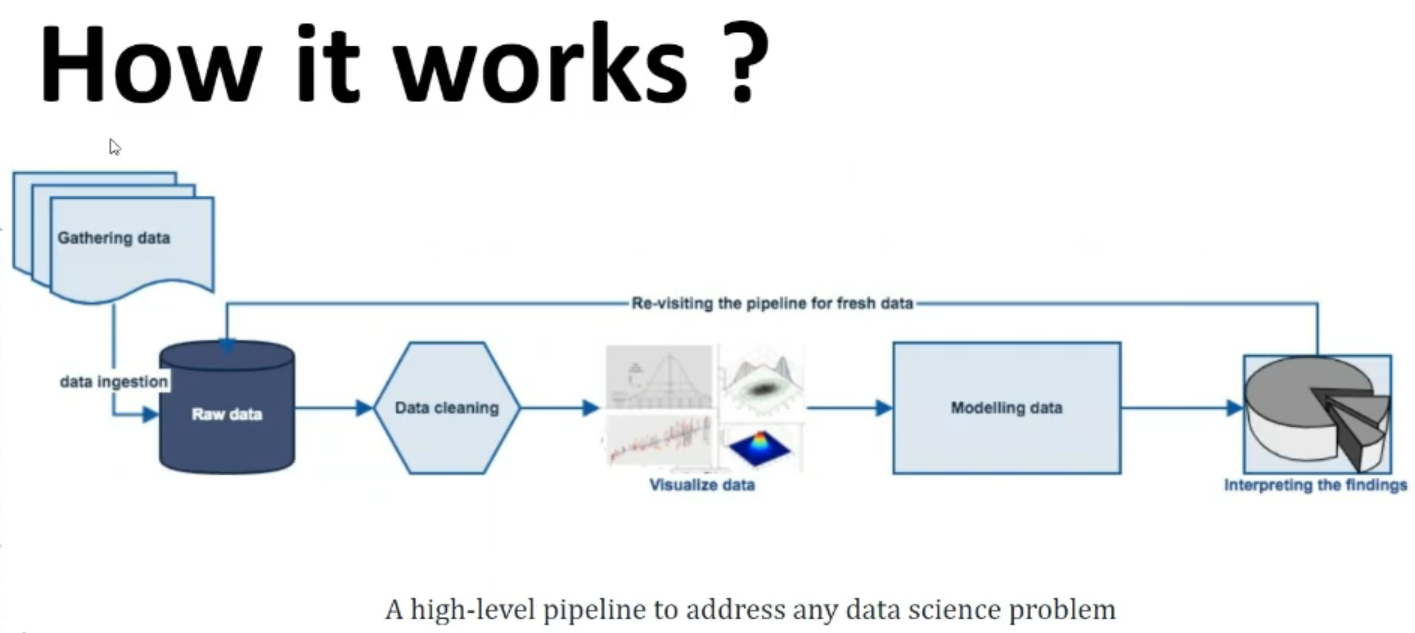 

## Fuentes de Datos
<br><br>
A partir del 2003 INS/CENAN implementa el Sistema de Información del Estado Nutricional-SIEN donde nos ofrecen bastantes [informes](https://web.ins.gob.pe/es/alimentacion-y-nutricion/vigilancia-alimentaria-y-nutricional/vigilancia-del-sistema-de-informacion-del-estado-nutricional-en-%20EESS) de estados nutriciales
 <br> <br>
Estos informes han sido procesados a partir de un proceso continuo y sistemático que registra, procesa, reporta y analiza información del estado nutricional de niños menores de cinco años y mujeres gestantes que acuden a establecimientos de salud, cuya fuente es [esta](https://www.datosabiertos.gob.pe/dataset/sistema-de-informaci%C3%B3n-del-estado-nutricional-de-ni%C3%B1os-y-gestantes-per%C3%BA-inscenan-instituto)
<br> <br>
Los existen de años [2019](https://datos.ins.gob.pe/dataset/22c04d6a-073d-406c-9086-0b8cfc88dfce/resource/ffcb0a6a-fb3a-4855-afe9-07dd362b086c/download/his-ninos-2019.zip) y [2020](https://datos.ins.gob.pe/dataset/22c04d6a-073d-406c-9086-0b8cfc88dfce/resource/e68a73ae-d7f7-49bb-a223-c087ffe0780c/download/his-ninos-2020.zip) en formato WinraZIP 


## Ingestión de Datos

**Descargar Datos**

In [2]:
# Libreria para extraer archivos WinraZIP
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=6f5e3d2a4ec15e023ea3d59a3280c89f0a628c3afffe5814e1392b4bb178ec7c
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [3]:
link_data_2019 = "https://datos.ins.gob.pe/dataset/22c04d6a-073d-406c-9086-0b8cfc88dfce/resource/ffcb0a6a-fb3a-4855-afe9-07dd362b086c/download/his-ninos-2019.zip"
link_data_2020 = "https://datos.ins.gob.pe/dataset/22c04d6a-073d-406c-9086-0b8cfc88dfce/resource/e68a73ae-d7f7-49bb-a223-c087ffe0780c/download/his-ninos-2020.zip"

In [ ]:
import wget
output_directory= "DataSet"
wget.download(url=link_data_2019,out=output_directory)
wget.download(url=link_data_2020,out=output_directory)

**Comprobamos que esten los archivos descargados y nos quedamos con los nombres de los archivos zip**

In [14]:
import os
files = os.listdir('DataSet/')
files_Zip = [file_name for file_name in files if file_name[-4:] ==".zip"]
files_Zip

['his-ninos-2019.zip', 'his-ninos-2020.zip']

**Descomprimir los archivos Zip**

In [17]:
from zipfile import ZipFile
# https://docs.python.org/3/library/zipfile.html#zipfile-objects
for file in files_Zip:
    with ZipFile("DataSet/"+file, 'r') as zipObj:
        zipObj.extractall(path="DataSet/")

**Ver la extracción de los archivos ZIP**

In [20]:
import os
files = os.listdir('DataSet/')
files

['HIS Niños 2019',
 'HIS Niños 2020',
 'his-ninos-2019.zip',
 'his-ninos-2020.zip',
 'Informes procesados']

## exploración rapida

In [2]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

spark = SparkSession.builder.appName('spark_Pipeline').getOrCreate()

In [5]:
df_csv = (spark.read.format("csv")
      .option("header", "true") 
      .option("mode", "FAILFAST") 
      .option("inferSchema", "true")
      .load("DataSet/HIS Niños 2019/HB/Niños AREQUIPA.csv")
     )

DataFrame[Diresa: string, Red: string, Microred: string, EESS: string, Renipress: int, FechaAtencion: string, Sexo: string, FechaNacimiento: string, EdadMeses: int, UbigeoPN: double, DepartamentoPN: string, ProvinciaPN: string, DistritoPN: string, CentroPobladoPN: string, Juntos: int, SIS: int, Pin: int, Qaliwarma: int, Peso: string, Talla: string, Hemoglobina: double, FechaHemoglobina: string, Cred: int, Suplementacion: int, Consejeria: int, Sesion: int, DEPARTAMENTO: string, PROVINCIA: string, DISTRITO: string, ALTITUD: int, HBC: double, Dx_Anemia: string]

In [6]:
df_csv.printSchema()

root
 |-- Diresa: string (nullable = true)
 |-- Red: string (nullable = true)
 |-- Microred: string (nullable = true)
 |-- EESS: string (nullable = true)
 |-- Renipress: integer (nullable = true)
 |-- FechaAtencion: string (nullable = true)
 |-- Sexo: string (nullable = true)
 |-- FechaNacimiento: string (nullable = true)
 |-- EdadMeses: integer (nullable = true)
 |-- UbigeoPN: double (nullable = true)
 |-- DepartamentoPN: string (nullable = true)
 |-- ProvinciaPN: string (nullable = true)
 |-- DistritoPN: string (nullable = true)
 |-- CentroPobladoPN: string (nullable = true)
 |-- Juntos: integer (nullable = true)
 |-- SIS: integer (nullable = true)
 |-- Pin: integer (nullable = true)
 |-- Qaliwarma: integer (nullable = true)
 |-- Peso: string (nullable = true)
 |-- Talla: string (nullable = true)
 |-- Hemoglobina: double (nullable = true)
 |-- FechaHemoglobina: string (nullable = true)
 |-- Cred: integer (nullable = true)
 |-- Suplementacion: integer (nullable = true)
 |-- Consejeria

In [9]:
df_csv.show(n=5)

+--------+--------------------+--------+--------------------+---------+-------------+----+---------------+---------+--------+--------------+-----------+----------+----------------+------+---+---+---------+----+-----+-----------+----------------+----+--------------+----------+------+------------+---------+--------+-------+--------------+-----------+
|  Diresa|                 Red|Microred|                EESS|Renipress|FechaAtencion|Sexo|FechaNacimiento|EdadMeses|UbigeoPN|DepartamentoPN|ProvinciaPN|DistritoPN| CentroPobladoPN|Juntos|SIS|Pin|Qaliwarma|Peso|Talla|Hemoglobina|FechaHemoglobina|Cred|Suplementacion|Consejeria|Sesion|DEPARTAMENTO|PROVINCIA|DISTRITO|ALTITUD|           HBC|  Dx_Anemia|
+--------+--------------------+--------+--------------------+---------+-------------+----+---------------+---------+--------+--------------+-----------+----------+----------------+------+---+---+---------+----+-----+-----------+----------------+----+--------------+----------+------+------------+--